In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\SANKARAN S\Downloads\Titanic-Dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode().iloc[0])
df.drop('Cabin', axis = 1, inplace = True)

In [8]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [9]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
import sqlite3

conn = sqlite3.connect('titanic_db')
df.to_sql('titanic_data', conn, if_exists = 'replace', index = False)

891

In [12]:
pd.read_sql("SELECT * FROM titanic_data LIMIT 3", conn)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,0,0
2,1,3,1,26.0,0,0,7.9250,0,1


In [13]:
pd.read_sql('SELECT COUNT(*) FROM titanic_data', conn)

,COUNT(*)
0,891


In [14]:
pd.read_sql("""
SELECT Sex, count(*) as total
FROM titanic_data
GROUP BY Sex
""", conn)

,Sex,total
0,0,577
1,1,314


In [15]:
pd.read_sql("""
SELECT Sex, 
       AVG(Survived) as Survived_rate
FROM titanic_data
GROUP BY Sex
""", conn)

,Sex,Survived_rate
0,0,0.188908
1,1,0.742038


In [16]:
pd.read_sql("""
SELECT Pclass, AVG(Age) as avy_age
FROM titanic_data
GROUP BY Pclass
""", conn)

,Pclass,avy_age
0,1,36.812130
1,2,29.765380
2,3,25.932627


In [17]:
pd.read_sql("""
SELECT Sex, Pclass,
       AVG(Survived) AS Survival_rate
FROM titanic_data
GROUP BY Sex, Pclass
ORDER BY Survival_rate DESC
""", conn)

,Sex,Pclass,Survival_rate
0,1,1,0.968085
1,1,2,0.921053
2,1,3,0.500000
3,0,1,0.368852
4,0,2,0.157407
5,0,3,0.135447


In [18]:
pd.read_sql("""
SELECT *
FROM titanic_data
ORDER BY Fare DESC
LIMIT 5
""", conn)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,1,1,35.0,0,0,512.3292,0,0
1,1,1,0,36.0,0,1,512.3292,0,0
2,1,1,0,35.0,0,0,512.3292,0,0
3,0,1,0,19.0,3,2,263.0000,0,1
4,1,1,1,23.0,3,2,263.0000,0,1


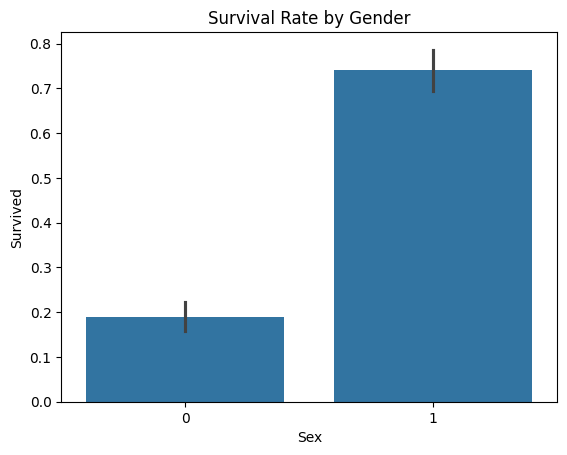

In [19]:
sns.barplot(x = 'Sex', y = 'Survived', data = df)
plt.title("Survival Rate by Gender")
plt.show()

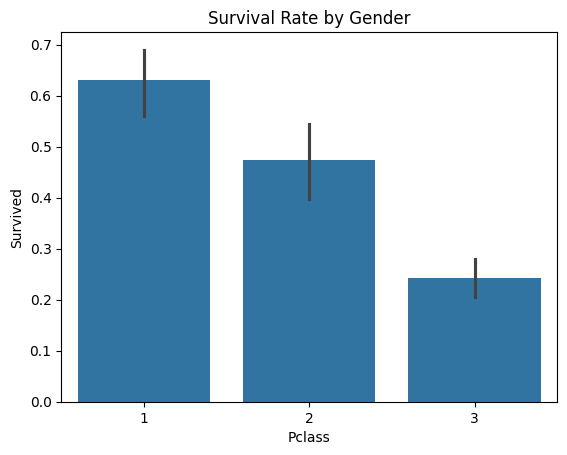

In [20]:
sns.barplot(x = 'Pclass', y = 'Survived', data = df)
plt.title("Survival Rate by Gender")
plt.show()

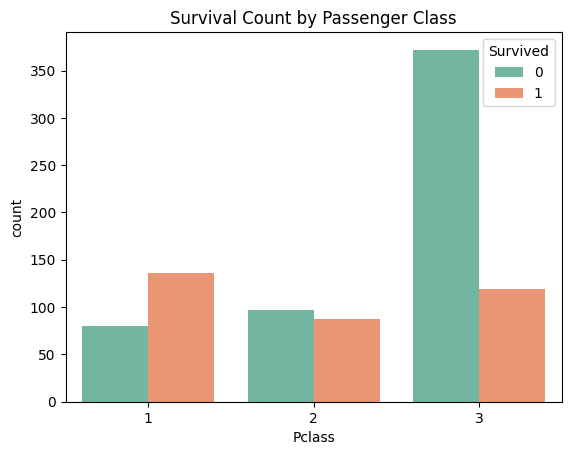

In [21]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = df, palette = 'Set2')
plt.title("Survival Count by Passenger Class")
plt.show()

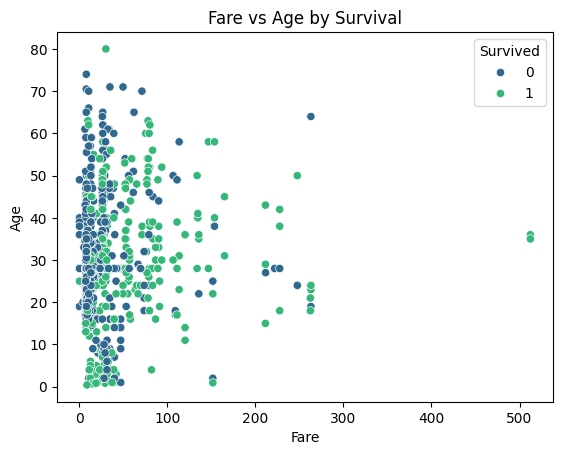

In [22]:
sns.scatterplot(x = 'Fare', y = 'Age', hue = 'Survived', data =df, palette = 'viridis')
plt.title("Fare vs Age by Survival")
plt.show()